In [3]:
!pip install numpy 
!pip install pandas 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')



In [4]:
df= pd.read_csv("C:/Users/Admin/Downloads/hotel_bookings.csv")

In [5]:
df.head()


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,7/3/2015


In [6]:
# checking for incorrect data types if any:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [7]:
# correcting data types changing reservation_status_date to datetime
df['reservation_status_date']= pd.to_datetime(df['reservation_status_date'])

In [8]:
# removing duplicates
df= df.drop_duplicates()

In [9]:
# checking for missing values
df.isna().sum()

hotel                                 0
is_canceled                           0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              4
babies                                0
meal                                  0
country                             452
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                             12193
company                           82137


<Axes: ylabel='agent'>

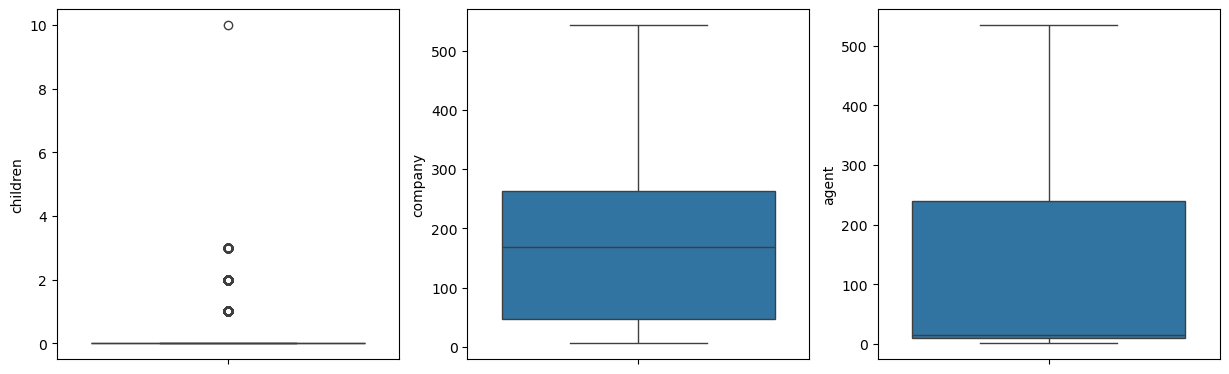

In [10]:
# checking for outliers to decide with what value missing values are to be filled with 
plt.figure(figsize=(15,10))
plt.subplot(2,3,1)
sns.boxplot(y='children',data=df)
plt.subplot(2,3,2)
sns.boxplot(y='company',data=df)
plt.subplot(2,3,3)
sns.boxplot(y='agent',data=df)

In [11]:
# filling missing values
df['children']= df['children'].fillna(df['children'].median())
df['company']= df['company'].fillna(df['company'].mean())
df['agent']= df['agent'].fillna(df['agent'].mean())
df['country']= df['country'].fillna(df['country'].mode()[0])


In [12]:
# Generating summary statistics for numerical and categorical variables.
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
count,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,...,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396
mean,0.274898,79.891368,2016.210296,26.838334,15.815541,1.005263,2.625395,1.875795,0.138633,0.010824,...,0.030413,0.183990,0.271603,94.138306,183.081384,0.749565,106.337246,0.084226,0.698567,2016-08-31 03:44:08.963339520
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000,2014-10-17 00:00:00
25%,0.000000,11.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,9.000000,183.081384,0.000000,72.000000,0.000000,0.000000,2016-03-18 00:00:00
50%,0.000000,49.000000,2016.000000,27.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,28.000000,183.081384,0.000000,98.100000,0.000000,0.000000,2016-09-08 00:00:00
75%,1.000000,125.000000,2017.000000,37.000000,23.000000,2.000000,4.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,234.000000,183.081384,0.000000,134.000000,0.000000,1.000000,2017-03-05 00:00:00
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,...,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000,2017-09-14 00:00:00
std,0.446466,86.052325,0.686102,13.674572,8.835146,1.031921,2.053584,0.626500,0.455871,0.113597,...,0.369145,1.731894,0.727245,104.995926,32.023528,10.015731,55.013953,0.281533,0.831946,NaN


In [13]:
# 1. What is the average lead time for bookings that are canceled versus those that are not canceled?
df.groupby('is_canceled')['lead_time'].mean().round(2)

is_canceled
0     70.10
1    105.72
Name: lead_time, dtype: float64

Text(0.5, 1.0, 'No. of bookings by Month')

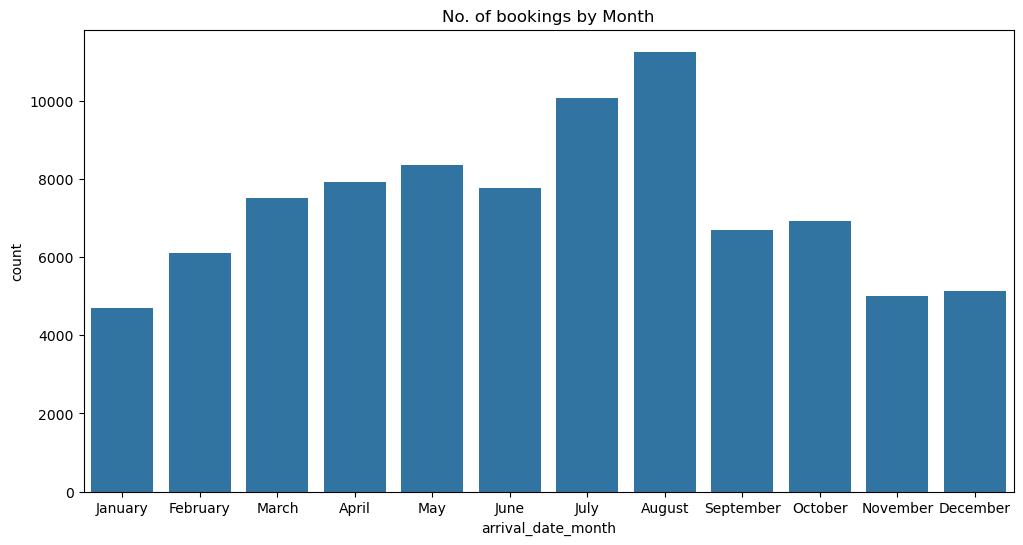

In [127]:
# 2.Which month has the highest number of bookings? (using graph)
month_order = ["January", "February", "March", "April", "May", "June", 
               "July", "August", "September", "October", "November", "December"]
df["arrival_date_month"] = pd.Categorical(df["arrival_date_month"], categories=month_order, ordered=True)
plt.figure(figsize=(12,6))
sns.countplot(x="arrival_date_month", data=df,order=month_order)


plt.title('No. of bookings by Month')

In [15]:
# 2.Which month has the highest number of bookings?
df.groupby("arrival_date_month")['is_canceled'].apply(lambda x: (x==0).sum()).idxmax()

'August'

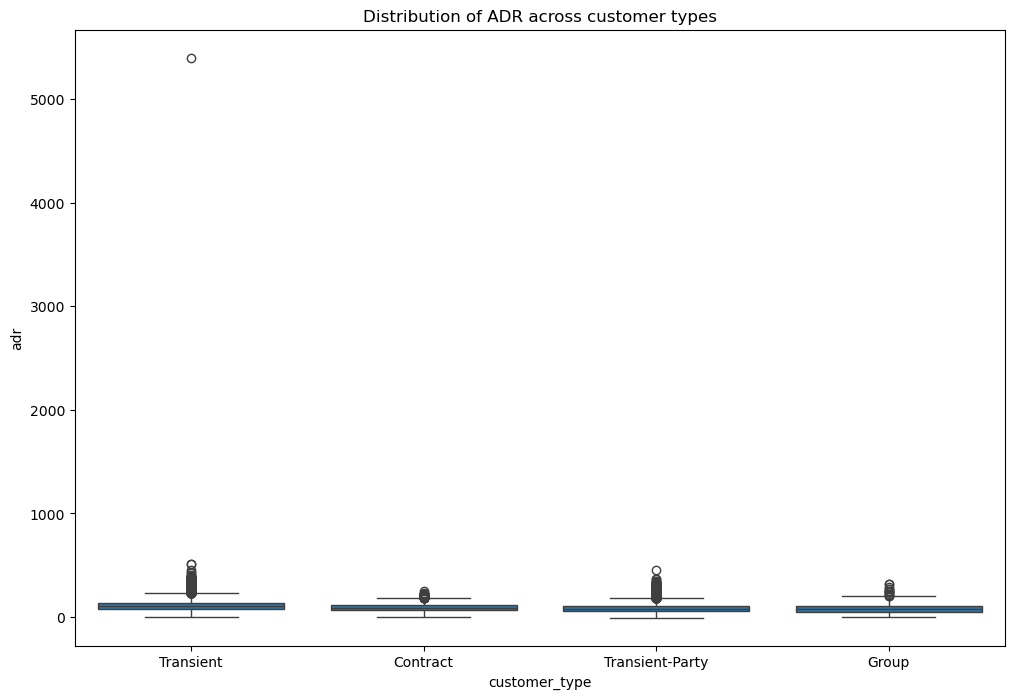

In [16]:
# 3.What is the distribution of ADR (Average Daily Rate) across different customer types?
plt.figure(figsize=(12,8))
sns.boxplot(x="customer_type",y="adr",data=df)
plt.title("Distribution of ADR across customer types")
plt.show()

In [17]:
# 4. How many bookings had special requests, and what is the average number of special requests per booking?
numer_of_special_request=df[df['total_of_special_requests']>0].shape[0]
numer_of_special_request


43502

In [18]:
average_request_per_booking= df['total_of_special_requests'].mean().round(2)
average_request_per_booking

0.7

In [22]:
# 5. What is the cancellation rate for each market segment?
df['cancellation_rate']= df['previous_cancellations']/(df['previous_cancellations']+df['previous_bookings_not_canceled'])
cancellation_rate_by_market_segment= df.groupby('market_segment')['cancellation_rate'].mean().round(2)
cancellation_rate_by_market_segment


market_segment
Aviation         0.08
Complementary    0.08
Corporate        0.06
Direct           0.13
Groups           0.80
Offline TA/TO    0.51
Online TA        0.50
Undefined         NaN
Name: cancellation_rate, dtype: float64

In [27]:
# 6. Which distribution channel has the highest average ADR?
df.groupby('distribution_channel')['adr'].mean().idxmax()

'GDS'

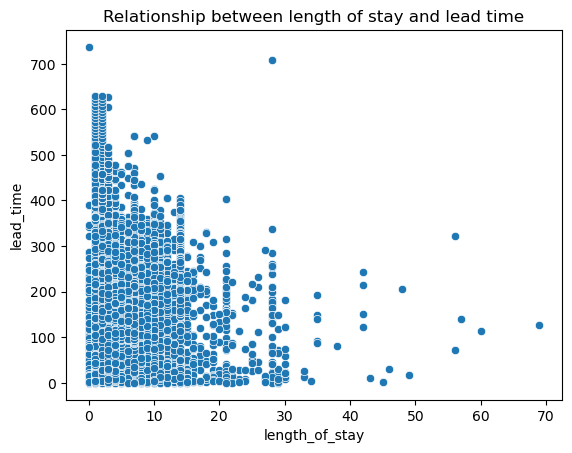

In [28]:
# 7. What is the correlation between lead time and the length of stay?

df["length_of_stay"] = df['stays_in_weekend_nights']+df['stays_in_week_nights']
sns.scatterplot(x="length_of_stay",y = "lead_time",data=df)
plt.title("Relationship between length of stay and lead time")
plt.show()


In [38]:
corr = df['length_of_stay'].corr(df['lead_time'])
corr

0.3182715795364348

In [43]:
# 8. How many bookings include children or babies?
bookings_include_either_babies_or_children=df[(df['children']>0) | (df['babies']>0)].shape[0]
bookings_include_either_babies_or_children

9103

In [45]:
# 8  How many bookings include children and babies?
bookings_include_both_babies_children= df[(df['children']>0) & (df['babies']>0)].shape[0]
bookings_include_both_babies_children

175

In [47]:
# 9. What is the average lead time for repeated guests compared to new guests?
df.groupby('is_repeated_guest')['lead_time'].mean().round(2)

is_repeated_guest
0    82.44
1    17.16
Name: lead_time, dtype: float64

In [49]:
# 10. What is the most common combination of reserved room type and assigned room type?
df.groupby(["reserved_room_type","assigned_room_type"]).size().idxmax()

('A', 'A')

In [52]:
                                                            # Subjective Answers 

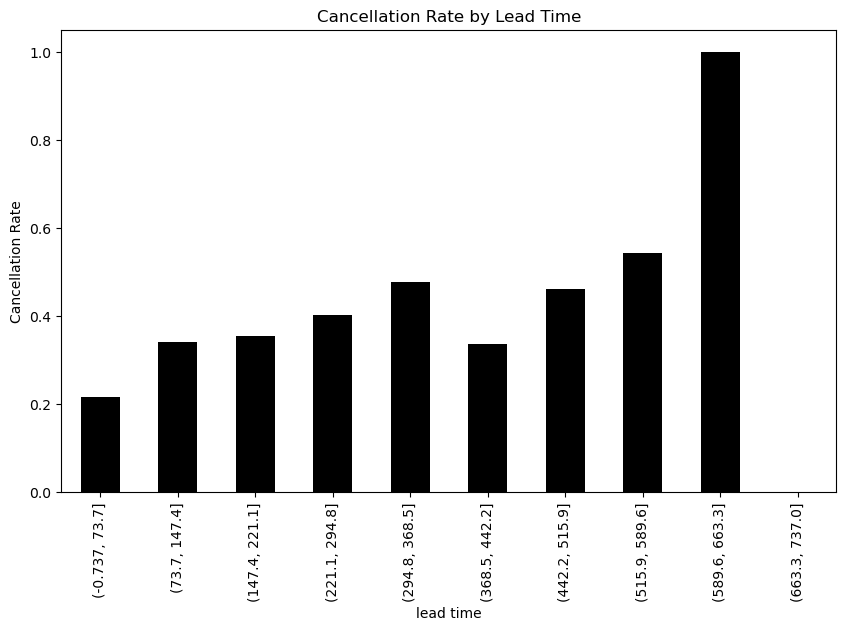

In [56]:
# 1.	How does the lead time affect the likelihood of booking cancellations?

df['lead_time_bin'] = pd.cut(df['lead_time'],bins=10)
cancellation_rate= df.groupby('lead_time_bin')['is_canceled'].mean()
cancellation_rate.plot(kind="bar",figsize=(10,6),color='black')
plt.title("Cancellation Rate by Lead Time")
plt.xlabel('lead time')
plt.ylabel('Cancellation Rate')
plt.show()

In [58]:
df.groupby('lead_time_bin').size()

lead_time_bin
(-0.737, 73.7]    52453
(73.7, 147.4]     17386
(147.4, 221.1]    10730
(221.1, 294.8]     4357
(294.8, 368.5]     1922
(368.5, 442.2]      330
(442.2, 515.9]      156
(515.9, 589.6]       46
(589.6, 663.3]       14
(663.3, 737.0]        2
dtype: int64

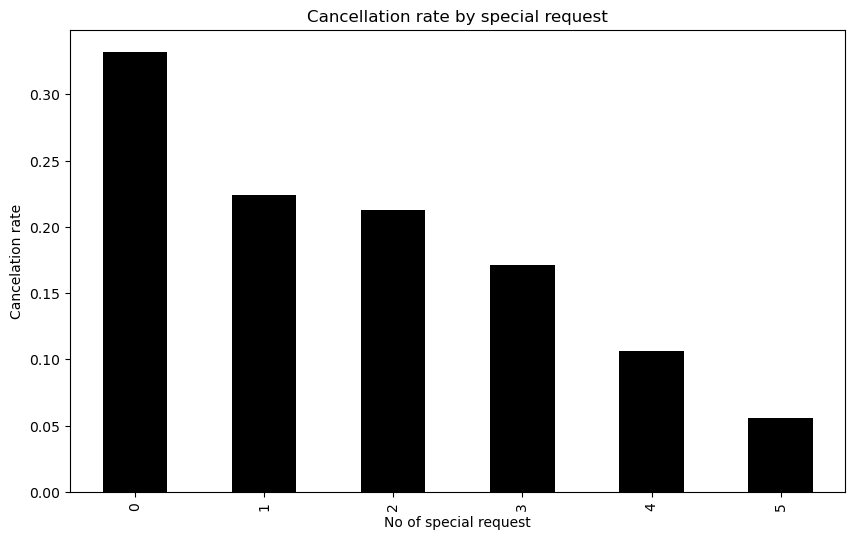

In [64]:
# 2.	What impact do special requests have on booking cancellations?
special_request_cancelation= df.groupby('total_of_special_requests')['is_canceled'].mean()
special_request_cancelation.plot(kind='bar',figsize=(10,6),color="black")
plt.title('Cancellation rate by special request')
plt.xlabel('No of special request')
plt.ylabel('Cancelation rate')
plt.show()


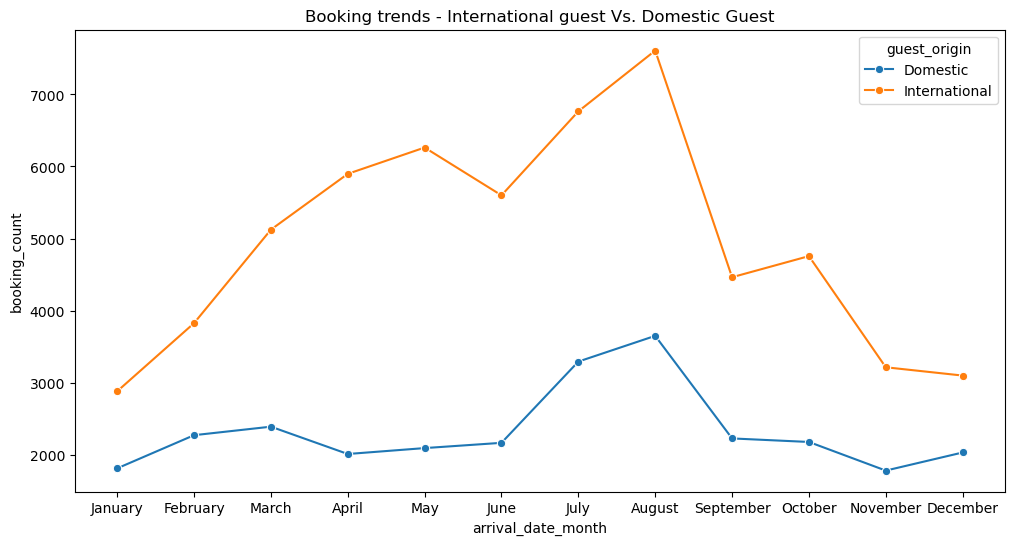

In [133]:
# 3. What trends can be observed in the booking behavior of international guests compared to domestic guests?
df['guest_origin']= df['country'].apply(lambda x: 'Domestic' if x=='PRT' else 'International')
booking_trends = df.groupby(['arrival_date_month', 'guest_origin']).size().reset_index(name='booking_count')

plt.figure(figsize=(12,6))
sns.lineplot(x='arrival_date_month', y='booking_count', hue='guest_origin', data = booking_trends, marker='o')
plt.title('Booking trends - International guest Vs. Domestic Guest')
plt.show()


TypeError: 'str' object is not callable

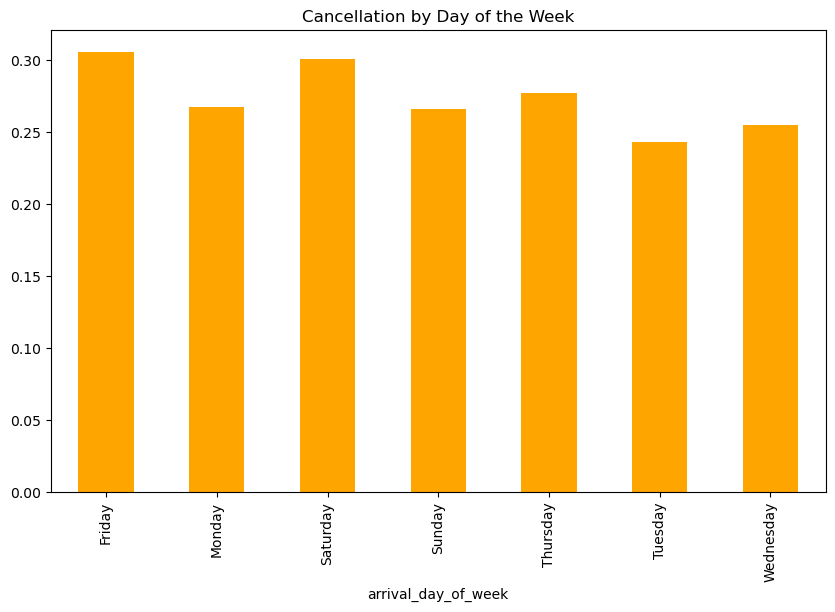

In [78]:
# 4.	What is the impact of the day of the week on booking cancellations?
df['arrival_date'] = pd.to_datetime(df.apply (lambda row: f"{row['arrival_date_day_of_month']} {row['arrival_date_month']} {row['arrival_date_year']}",axis=1),format='%d %B %Y')
df['arrival_day_of_week']= df['arrival_date'].dt.day_name()
cancellation_on_day_of_the_week= df.groupby("arrival_day_of_week")['is_canceled'].mean()

cancellation_on_day_of_the_week.plot(kind="bar",color="orange",figsize=(10,6))
plt.title('Cancellation by Day of the Week')
plt.xlabel('Day of week')
plt.ylabel('Cancellation rate')
plt.xticks(rotation=45)
plt.show()

In [80]:
# 5.	What are the most common countries for international guests, and how do their booking patterns compare to domestic guests?
international_guests = df[df['guest_origin'] == 'International'].groupby('country')['guest_origin'].count().sort_values(ascending=False)
international_guests.head(5)

country
GBR    10433
FRA     8837
ESP     7252
DEU     5387
ITA     3066
Name: guest_origin, dtype: int64

In [82]:
booking_patterns = df.groupby('guest_origin').agg({
                'lead_time' : 'mean','stays_in_week_nights':'mean','stays_in_weekend_nights':'mean','is_canceled':'mean'}).rename(columns=
                {'lead_time': 'Average lead time','stays_in_week_nights': 'Average week night stays',
                 'stays_in_weekend_nights':'Average weekend stays','is_canceled': 'Cancellation rate'}).reset_index()
booking_patterns

,guest_origin,Average lead time,Average week night stays,Average weekend stays,Cancellation rate
0,Domestic,64.410894,2.267909,0.812256,0.352087
1,International,87.152679,2.793078,1.095796,0.238692
